##Classificação de Imagens Reais

Baixe o seguinte arquivo: https://www.dropbox.com/s/sofyakylqodcrd3/Digitos.zip?dl=0

Faça o upload desse aquivo para a pasta principal de arquivos do Google Colab

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,AveragePooling2D
from keras.utils import img_to_array , load_img
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import zipfile

In [3]:
with zipfile.ZipFile('/content/Digitos.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Datasets')

In [4]:
train_datagen = ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='training',
    target_size=(30, 30))


Found 5473 images belonging to 10 classes.


In [5]:
valid_generator = train_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Treinamento',
    batch_size=200,
    color_mode = 'grayscale',
    subset='validation',
    target_size=(30, 30))

Found 1363 images belonging to 10 classes.


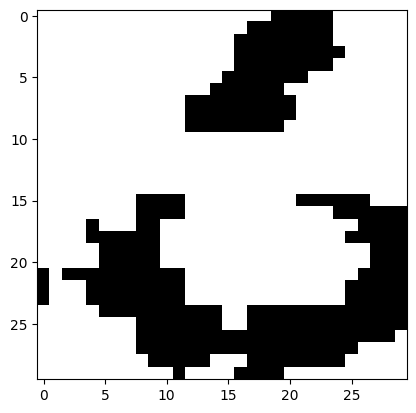

In [6]:
#Visualizando
x,y = next(train_generator)
for i in range(0,1):
    image = x[i]
    plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
    plt.show()

In [7]:
x.shape

(200, 30, 30, 1)

In [8]:
image.shape

(30, 30, 1)

In [9]:
y[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
num_classes = 10

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


In [11]:
# Cria o modelo
model = Sequential()

#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros)
model.add(Conv2D(64, (5, 5), input_shape=(30,30,1), activation='relu', padding='same'))
print( model.output_shape)
#Camada de Pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 128 kernels/Pesos (filtros)
model.add(Conv2D(128, (3, 3), activation='relu'))
print( model.output_shape)
#Camada de Pooling
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Remove 30% dos dados de entrada aleatoriamente
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(None, 30, 30, 64)
(None, 15, 15, 64)
(None, 13, 13, 128)
(None, 6, 6, 128)
(None, 4608)
(None, 64)
(None, 64)
(None, 10)


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
mcp_save = ModelCheckpoint('model_best.keras', monitor='val_accuracy', mode= 'auto', save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 15, 15, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 375,306 (1.43 MB)

 Trainable params: 375,306 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3779 - loss: 8.3464
Epoch 1: val_accuracy improved from -inf to 0.85250, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 174ms/step - accuracy: 0.3862 - loss: 8.1654 - val_accuracy: 0.8525 - val_loss: 0.4456
Epoch 2/10
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9650 - loss: 0.1601

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.85250 to 0.87500, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9650 - loss: 0.1601 - val_accuracy: 0.8750 - val_loss: 0.3862
Epoch 3/10
26/27 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9413 - loss: 0.1955
Epoch 3: val_accuracy improved from 0.87500 to 0.96833, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9425 - loss: 0.1916 - val_accuracy: 0.9683 - val_loss: 0.1071
Epoch 4/10
 1/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9900 - loss: 0.0380
Epoch 4: val_accuracy improved from 0.96833 to 0.97250, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9900 - loss: 0.0380 - val_accuracy: 0.9725 - val_loss: 0.1009
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9819 - loss: 0.0616
Epoch 5: val_accuracy improved from 0.97250 to 0.98417, saving model to model_best.keras
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step 

In [14]:
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    '/content/Datasets/Digitos/Teste',
    batch_size=1,
    color_mode = 'grayscale',
    target_size=(30, 30))

Found 73 images belonging to 10 classes.


In [15]:
scores = model.evaluate(test_generator)
print(scores)

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9748 - loss: 0.0784
[0.048653531819581985, 0.9863013625144958]


In [16]:
predictions = model.predict(test_generator)
print(predictions)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[9.99778450e-01 1.13709370e-06 2.22456272e-11 7.17260662e-07
  1.75741421e-09 2.40164518e-05 1.68521149e-06 1.22369042e-12
  1.92613836e-04 1.25715803e-06]
 [2.31654322e-08 6.12847515e-08 9.99795854e-01 2.99532786e-07
  7.21501262e-11 6.16567434e-07 5.19704835e-10 1.60852986e-04
  4.21472578e-05 8.79383857e-11]
 [6.11627638e-06 6.58157296e-06 2.17529168e-06 1.10852731e-08
  9.99906063e-01 7.52420959e-10 4.32885172e-05 2.58610326e-05
  9.58739929e-06 4.12451357e-07]
 [2.33466897e-04 9.22577897e-07 5.88729605e-03 4.54038382e-05
  2.03751522e-08 3.30402981e-04 4.35627328e-04 1.85919765e-04
  9.92880821e-01 7.92603032e-08]
 [5.03589808e-06 2.83273014e-08 3.55078555e-07 1.43854209e-07
  1.97979674e-10 1.32943399e-06 2.52301458e-10 2.33123919e-11
  9.99992967e-01 9.67793170e-08]
 [3.12717270e-06 2.04957962e-09 1.84341360e-08 4.83461736e-06
  1.43151003e-11 9.99982238e-01 9.81136873e-06 4.39069059e-10
  3.08416475e-08 4.28930136e-09]
 [8.13314909e-05 8.

In [17]:
res1 = np.argmax(predictions[0,:])
print(res1)

0


Como Fazer a predição de uma imagem PNG?

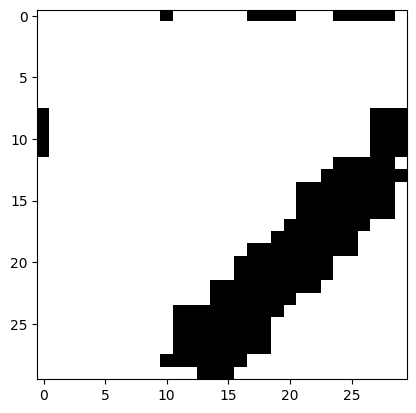

In [18]:
#fileimg = r'D:\digito_7_2SAN.png'
fileimg = r'/content/Datasets/Digitos/Teste/7/digito_2_36-49-513863.png'

img = load_img(fileimg , color_mode = "grayscale", target_size=(30, 30))

#
x = img_to_array(img)

plt.imshow(x[:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

In [19]:
print(x[:,:,0])

[[255. 255. 255. 255. 255. 255. 255. 255. 255. 255.   0. 255. 255. 255.
  255. 255. 255.   0.   0.   0.   0. 255. 255. 255.   0.   0.   0.   0.
    0. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 2

In [20]:
x.shape

(30, 30, 1)

In [21]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 30, 30, 1)

In [22]:
y_pred = model.predict(x)

res = np.argmax(y_pred)
print(res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
7


In [23]:
y_pred

array([[1.3933701e-06, 2.4219551e-04, 7.4566118e-03, 9.6043608e-05,
        1.9592904e-05, 3.2695425e-05, 8.6501626e-07, 9.9185878e-01,
        2.4652926e-04, 4.5281595e-05]], dtype=float32)

In [24]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}